# Equity Trading Model (Enhanced) 

The Global Coronavirus Crisis (GCC) has offered tremendous trading opportunities in financial markets due to strong trends and high volatility spikes across all asset classes.

#### Thesis:
This research project aims to predict if the price of a security will be higher or lower in N-days from now using price-based (Technical) indicators and fundamental metrics as features.

#### Label:
- y = close price in N day > today, 1, else 0

#### Features:
Volatility:
- Average True Range
- Bollinger Bands with 1 STD
- Equity Volatility Index (VIX)

Trend Following:
- Moving Average Convergence Divergence Spread
- N-day Simple Moving Average
- Average Directional Index

Trend Reversal:
- Relative Strength Index
- Stochastic Spread
- Volume Spread

Fundamental Metrics:
- Enterprise Value
- Total Debt to EV
- EV to Sales
- Price to Sales Per Share
- EV to EBIT
- Price to Earnings
- Price to Cash Flow Per Share
- EV to Operating Cash Flow Per Share
- Price to Book Value Per Share
- Price to Tangible Book Value Per Share
- EV to EBITDA

### Import Packages

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use('seaborn-dark-palette')

import warnings 
warnings.filterwarnings('ignore')

### Import & Clean Data

CSV Data Pull

import csv 
df = pd.read_csv('aapl.csv')

df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True) 
df.index = df.index.map(lambda t: t.strftime('%Y-%m-%d'))

ric = 'AAPL.O' 

df.columns = ['priceclose','priceopen','pricehigh','pricelow','volume','ev','totdebttoev','evtosales','ptosps','evtoebit','pe','ptocfps','evtoopcf','ptobvps','ptotanbvpershare','evtoebitda','vix']

df

API Data Pull

In [2]:
import eikon as tr
tr.set_app_key('29e7c9361eb64e748246349dff7c07a532e1f41d')

ric = 'AAPL.O'
start = '2000-01-29'
end = '0'

df, e= tr.get_data([ric],['tr.priceclose.date','tr.priceclose','tr.open','tr.high','tr.low','tr.volume','tr.ev','tr.h.totaldebttoev','tr.h.evtosales','tr.h.pricetosalespershare','tr.h.evtoebit','tr.h.pe','tr.h.pricetocfpershare','tr.h.evtooperatingcashflow','tr.h.pricetobvpershare','tr.h.pricetotangbvpershare','tr.h.evtoebitda'],
                       {'SDate': start,'EDate': end,'Frq':'D'})

def clean(df):
    df['Date'] = pd.to_datetime(df['Date'])
    df.set_index('Date', inplace=True) 
    df.index = df.index.map(lambda t: t.strftime('%Y-%m-%d'))
    df.columns = map(str.lower, df.columns)
    df = df.round(2)
    return df

df = clean(df)

df.columns = ['instrument','priceclose','priceopen','pricehigh','pricelow','volume','ev','totdebttoev','evtosales','ptosps','evtoebit','pe','ptocfps','evtoopcf','ptobvps','ptotanbvpershare','evtoebitda']

df['totdebttoev'] = df['totdebttoev'].astype(float)
df['evtoebit'] = df['evtoebit'].astype(float)
df['pe'] = df['pe'].astype(float)
df['evtoebitda'] = df['evtoebitda'].astype(float)

df

,instrument,priceclose,priceopen,pricehigh,pricelow,volume,ev,totdebttoev,evtosales,ptosps,evtoebit,pe,ptocfps,evtoopcf,ptobvps,ptotanbvpershare,evtoebitda
Date,,,,,,,,,,,,,,,,,
2000-01-31,AAPL.O,0.93,0.90,0.93,0.84,701680701,NaN,2.220537,2.00,2.69,36.812656,28.121990,18.76,13.90,3.92,3.92,30.089632
2000-02-01,AAPL.O,0.90,0.93,0.94,0.89,318035518,NaN,2.317284,1.91,2.60,35.275718,27.173297,18.13,13.32,3.79,3.79,28.833382
2000-02-02,AAPL.O,0.88,0.90,0.91,0.87,464195664,NaN,2.359507,1.88,2.57,34.644475,26.783655,17.87,13.08,3.74,3.74,28.317422
2000-02-03,AAPL.O,0.92,0.90,0.93,0.90,475194075,NaN,2.232186,1.99,2.68,36.620539,28.003404,18.68,13.83,3.91,3.91,29.932601
2000-02-04,AAPL.O,0.96,0.93,0.98,0.93,425320425,NaN,2.113395,2.10,2.81,38.678939,29.273975,19.53,14.60,4.08,4.08,31.615079
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-11-16,AAPL.O,120.30,118.92,120.99,118.15,91183018,2.067471e+12,5.470307,7.53,7.68,31.189216,36.728899,26.14,25.63,31.26,31.26,26.730849
2020-11-17,AAPL.O,119.39,119.55,120.67,118.96,74270973,2.051999e+12,5.511552,7.47,7.62,30.955816,36.451066,25.94,25.44,31.02,31.02,26.530812
2020-11-18,AAPL.O,118.03,118.61,119.82,118.00,76322111,2.028877e+12,5.574365,7.39,7.54,30.606998,36.035843,25.64,25.15,30.67,30.67,26.231856


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5278 entries, 2000-01-31 to 2020-11-20
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   instrument        5278 non-null   object 
 1   priceclose        5278 non-null   float64
 2   priceopen         5278 non-null   float64
 3   pricehigh         5278 non-null   float64
 4   pricelow          5278 non-null   float64
 5   volume            5278 non-null   int64  
 6   ev                5037 non-null   float64
 7   totdebttoev       3070 non-null   float64
 8   evtosales         5278 non-null   float64
 9   ptosps            5278 non-null   float64
 10  evtoebit          5213 non-null   float64
 11  pe                5213 non-null   float64
 12  ptocfps           5278 non-null   float64
 13  evtoopcf          5278 non-null   float64
 14  ptobvps           5278 non-null   float64
 15  ptotanbvpershare  5278 non-null   float64
 16  evtoebitda        5213 non-null 

In [4]:
len(df)

5278

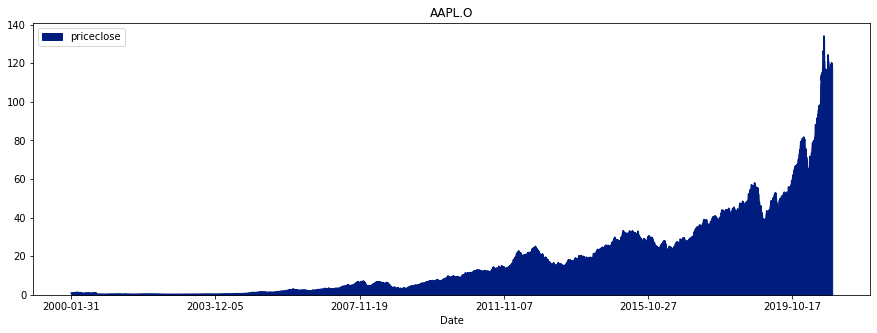

In [5]:
df['priceclose'].plot(figsize=(15,5),kind='area',title=ric,legend=True);

## Features

In [6]:
# Set Y Label
y = -21

df['priceiny'] = np.where(df['priceclose']<df['priceclose'].shift(y),1,0)

#### Price Return

In [7]:
df['pcshift'] = df['priceclose'].shift(1)
df['dailyreturn'] = (((df['priceclose']-df['pcshift'])/df['pcshift'])*100).round(2)

#### Average True Range

In [8]:
df['hmpc'] = abs(df['pricehigh']-df['pcshift'])
df['lmpc'] = abs(df['pricelow']-df['pcshift'])
df['hml'] = df['pricehigh']-df['pricelow']
df['true range'] = df[['hml','hmpc','lmpc']].max(axis=1)
df['atr'] = ((df['true range'].rolling(14).mean().shift(1)*(14-1))+df['true range'])/14

#### Bollinger Bands

In [9]:
rolling_mean = df['priceclose'].rolling(window=14).mean()
rolling_std = df['priceclose'].rolling(window=14).std()

df['bbplus'] = rolling_mean + (rolling_std * 1)
df['bbminus'] = rolling_mean - (rolling_std * 1) 

#### MACD Spread

In [10]:
df['ma12'] = df['priceclose'].rolling(window=12).mean()
df['ma26'] = df['priceclose'].rolling(window=26).mean()

df['ma12shift'] = df['ma12'].shift(1)
df['ma26shift'] = df['ma26'].shift(1)

df['fastma12'] = (df['priceclose']-df['ma12shift'])*(2/(12+1))+df['ma12shift']
df['slowma26'] = (df['priceclose']-df['ma26shift'])*(2/(26+1))+df['ma26shift']

df['madiff'] = df['fastma12']-df['slowma26']
df['madiffshift'] = df['madiff'].shift(1)

df['signalma9'] = (df['madiff']-df['madiffshift'])*(2/(9+1))+df['madiffshift']
df['macdspread'] = df['madiff']-df['signalma9']

#### N-day SMA

In [11]:
df['smaNday'] = df['priceclose'].rolling(window=abs(y)).mean()
df['smaNdummy'] = [1 if row['priceclose']>row['smaNday'] else 0 for idx,row in df.iterrows()]

#### Average Directional Index

In [12]:
df['hmph'] = df['pricehigh']-df['pricehigh'].shift(1)
df['plml'] = df['pcshift']-df['pricelow']

df['+dx'] = [row['hmph'] if row['hmph']>row['plml'] and row['hmph']>0 else 0 for idx,row in df.iterrows()]
df['-dx'] = [row['plml'] if row['plml']>row['hmph'] and row['plml']>0 else 0 for idx,row in df.iterrows()]

df['smooth+dx'] = ((df['+dx'].rolling(window=14).mean().shift(1)*(14-1))+df['+dx'])/14
df['smooth-dx'] = ((df['-dx'].rolling(window=14).mean().shift(1)*(14-1))+df['-dx'])/14

df['+dmi'] = (df['smooth+dx']/df['atr'])*100
df['-dmi'] = (df['smooth-dx']/df['atr'])*100

df['dx'] = ((abs(df['+dmi']-df['-dmi']))/(df['+dmi']+df['-dmi']))*100
df['adx'] = (df['dx'].rolling(window=14).mean().shift(1)*(14-1)+df['dx'])/14

#### Relative Strength Index

In [13]:
df['upmove'] = [row['priceclose']-row['pcshift'] if row['priceclose']>row['pcshift'] else 0 for idx,row in df.iterrows()]
df['dnmove'] = [row['pcshift']-row['priceclose'] if row['priceclose']<row['pcshift'] else 0 for idx,row in df.iterrows()]

df['avgupmove'] = df['upmove'].rolling(window=14).mean()
df['avgdnmove'] = df['dnmove'].rolling(window=14).mean()

df['avgupmoveshift'] = df['avgupmove'].shift(1)
df['avgdnmoveshift'] = df['avgdnmove'].shift(1)

df['avgupmove1'] = (df['avgupmoveshift']*(14-1)+df['upmove'])/14
df['avgdnmove1'] = (df['avgdnmoveshift']*(14-1)+df['dnmove'])/14

df['relstrength'] = df['avgupmove1']/df['avgdnmove1']
df['rsi'] = 100-(100/(df['relstrength']+1))

#### Stochastic Spread

In [14]:
df['stochlow'] = df['priceclose']-(df['pricelow'].rolling(window=14).min())
df['stochhml'] = (df['pricehigh'].rolling(window=14).max())-(df['pricelow'].rolling(window=14).min())
df['%k'] = (df['stochlow']/df['stochhml'])*100
df['%d'] = (df['stochlow'].rolling(window=3).sum()/df['stochhml'].rolling(window=3).sum())*100
df['signal'] = df['%d'].rolling(window=3).mean()

df['stochspread'] = df['%k']-df['signal']

#### Volume-NdayVol Spread

In [15]:
df['volumeNdayavg'] = df['volume'].rolling(window=abs(y)).mean()
df['volspread'] = df['volume']-df['volumeNdayavg']

#### Equity Volatility Index

In [16]:
vix, e= tr.get_data(['.VIX'],['tr.priceclose.date','tr.priceclose'],
                       {'SDate': start,'EDate': end,'Frq':'D'})
vix = clean(vix)
vix = vix[~vix.index.duplicated()]
df['vix'] = vix['price close'] #If using CSV pull, ignore this error. It only works with the API. 

## Feature Exploration

In [17]:
df = df[['priceiny','priceclose','dailyreturn','totdebttoev', 'ev', 'evtosales', 'ptosps', 'evtoebit', 'pe',
       'ptocfps', 'evtoopcf', 'ptobvps', 'ptotanbvpershare',
       'evtoebitda', 'atr', 'bbplus', 'bbminus', 'macdspread','smaNdummy',
       'adx', 'rsi', 'stochspread','volspread', 'vix']]

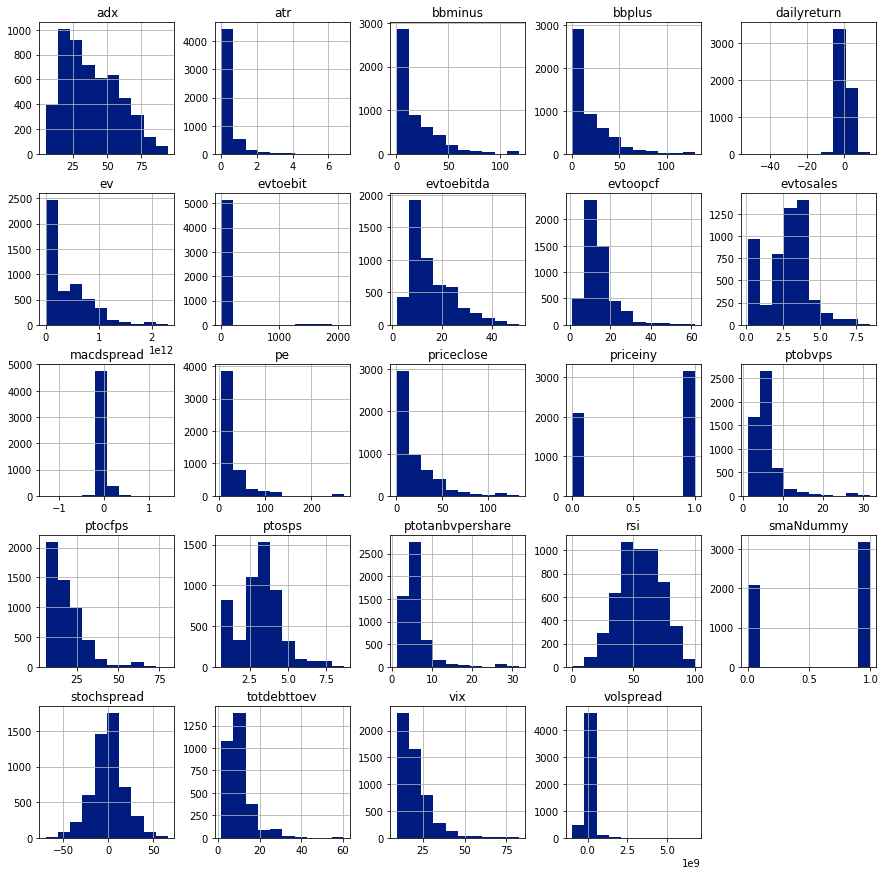

In [18]:
pd.DataFrame.hist(df, figsize = [15,15]);

In [19]:
df.describe().round(2)

,priceiny,priceclose,dailyreturn,totdebttoev,ev,evtosales,ptosps,evtoebit,pe,ptocfps,...,atr,bbplus,bbminus,macdspread,smaNdummy,adx,rsi,stochspread,volspread,vix
count,5278.00,5278.00,5277.00,3070.00,5.037000e+03,5278.00,5278.00,5213.00,5213.00,5278.00,...,5264.00,5265.00,5265.00,5251.00,5278.00,5250.00,5264.00,5261.00,5.258000e+03,5278.00
mean,0.60,18.11,0.13,10.14,3.932412e+11,2.84,3.21,41.54,30.05,18.33,...,0.43,18.49,17.53,0.00,0.60,38.84,55.32,-0.05,-4.353892e+05,19.95
std,0.49,22.61,2.58,6.40,4.258538e+11,1.50,1.36,181.52,34.67,10.31,...,0.71,23.02,21.66,0.09,0.49,19.84,17.18,18.20,2.467846e+08,8.95
min,0.00,0.23,-52.08,1.50,5.874789e+08,0.09,0.63,1.98,5.49,5.82,...,0.01,0.25,0.23,-1.31,0.00,4.82,0.00,-69.62,-9.812637e+08,9.14
25%,0.00,1.30,-0.96,5.57,4.025296e+10,2.04,2.44,10.42,13.70,10.78,...,0.06,1.37,1.28,-0.01,0.00,22.06,43.10,-10.49,-9.194163e+07,13.61
50%,1.00,8.98,0.00,9.46,2.648499e+11,3.01,3.37,14.24,17.86,15.25,...,0.23,9.28,8.78,0.00,1.00,35.43,55.40,0.04,-2.169139e+07,17.61
75%,1.00,27.35,1.29,12.68,6.418380e+11,3.75,3.94,26.29,32.87,23.20,...,0.51,27.97,26.86,0.01,1.00,54.01,68.09,10.31,4.937025e+07,23.68
max,1.00,134.18,13.89,60.37,2.315166e+12,8.45,8.69,2103.83,269.98,80.47,...,6.86,129.84,118.64,1.44,1.00,94.77,100.00,66.67,6.733987e+09,82.69


In [20]:
df[df['dailyreturn'] == df['dailyreturn'].min()].round(2)

,priceiny,priceclose,dailyreturn,totdebttoev,ev,evtosales,ptosps,evtoebit,pe,ptocfps,...,atr,bbplus,bbminus,macdspread,smaNdummy,adx,rsi,stochspread,volspread,vix
Date,,,,,,,,,,,,,,,,,,,,,
2000-09-29,0,0.46,-52.08,6.01,NaN,0.67,1.24,9.73,12.78,10.16,...,0.1,1.12,0.8,-0.04,0,53.16,21.65,-13.81,6.733987e+09,20.57


In [21]:
df[df['dailyreturn'] == df['dailyreturn'].max()].round(2)

,priceiny,priceclose,dailyreturn,totdebttoev,ev,evtosales,ptosps,evtoebit,pe,ptocfps,...,atr,bbplus,bbminus,macdspread,smaNdummy,adx,rsi,stochspread,volspread,vix
Date,,,,,,,,,,,,,,,,,,,,,
2001-04-18,1,0.41,13.89,7.81,4.135000e+09,0.66,1.31,7.66,41.65,21.36,...,0.03,0.4,0.36,0.0,1,38.62,53.57,18.98,6.128811e+08,24.13


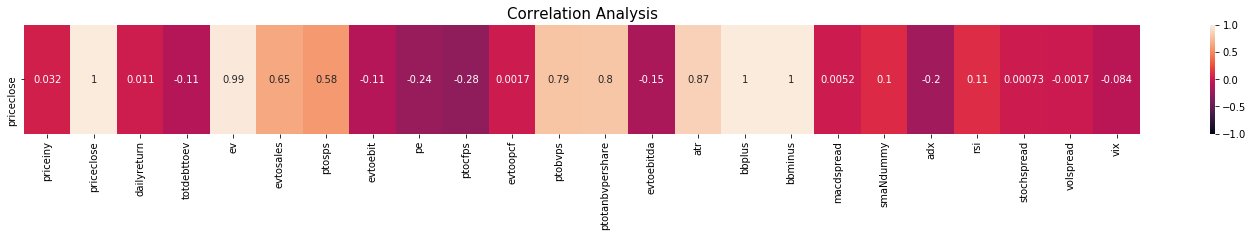

In [22]:
fig, ax = plt.subplots(1, 1, figsize=(25,2))
sns.heatmap(df.corr()[1:2],vmin=-1,vmax=1,annot=True)
ax.set_title('Correlation Analysis', size=15);

Correlation Analysis:
- The non-stationary time-series features are strongly correlated with the price close such as Bollinger bands and the n-day simple moving average.
- The price close is strongly correlated with the enterprise value, including the market value of equity.

Market-Related Analysis:
- ATR is positively correlated with BB and 10-day SMA
- ADX is negatively correlated with RSI
- MACD Spread is positively correlated with daily price return

## Feature Selection

Mutual information (MI) between two random variables is a non-negative value, which measures the dependency between the variables. It is equal to zero if and only if two random variables are independent, and higher values mean higher dependency.

In [23]:
features_to_include = ['totdebttoev', 'ev', 'evtosales', 'ptosps', 'evtoebit', 'pe',
       'ptocfps', 'evtoopcf', 'ptobvps', 'ptotanbvpershare',
       'evtoebitda', 'atr', 'bbplus', 'bbminus', 'macdspread','smaNdummy',
       'adx', 'rsi', 'stochspread','volspread', 'vix']
df = df.ffill(axis=0).dropna()

In [24]:
from sklearn import feature_selection
feature_rank = feature_selection.mutual_info_classif(df[features_to_include], df['priceiny'])
feature_rank_df = pd.DataFrame(list(zip(features_to_include, feature_rank)), columns=['Feature', 'Score'])
feature_rank_df.sort_values(by='Score', ascending = False)

,Feature,Score
12,bbplus,0.159723
13,bbminus,0.151204
1,ev,0.100466
9,ptotanbvpershare,0.062759
5,pe,0.055485
4,evtoebit,0.049339
8,ptobvps,0.049248
11,atr,0.039743
6,ptocfps,0.039550
3,ptosps,0.038856


## Split Dataset

In [25]:
len(df)

5037

In [26]:
df = df.dropna()

In [27]:
z = int(.70*len(df))
x_train = df[['totdebttoev', 'ev','evtosales', 'ptosps', 'evtoebit', 'pe', 'ptocfps', 'evtoopcf',
       'ptobvps', 'ptotanbvpershare', 'evtoebitda', 'atr',
       'bbplus', 'bbminus', 'macdspread', 'smaNdummy', 'adx', 'rsi',
       'stochspread', 'volspread', 'vix']][:z]
y_train = df[['priceiny']][:z]

x_test = df[['totdebttoev', 'ev','evtosales', 'ptosps', 'evtoebit', 'pe', 'ptocfps', 'evtoopcf',
       'ptobvps', 'ptotanbvpershare', 'evtoebitda', 'atr',
       'bbplus', 'bbminus', 'macdspread', 'smaNdummy', 'adx', 'rsi',
       'stochspread', 'volspread', 'vix']][z:y]
y_test = df[['priceiny']][z:y] #removed the end of the timeseries due to shifted Y labels

## Data Preprocessing

In [28]:
from sklearn.preprocessing import StandardScaler 

In [29]:
scaler = StandardScaler()
std_x_train = scaler.fit(x_train).transform(x_train)
std_x_test = scaler.fit(x_test).transform(x_test)

In [30]:
for i  in range(2):
    print(std_x_train[i])

[ 2.59079639 -0.88770127 -1.59633805 -1.72745735 -0.2324677  -0.72920209
 -1.26055249 -1.53201308 -1.50440053 -1.52455193 -1.44573855 -0.97739527
 -0.9198631  -0.91160272  0.08963148  0.805921    0.66071735 -0.32026857
  2.17352091  0.16905415  0.99145868]
[ 1.63390587 -0.88497319 -1.55525709 -1.67560974 -0.22813939 -0.71269255
 -1.20621089 -1.4657718  -1.45130714 -1.47264742 -1.36059775 -0.96420771
 -0.91917906 -0.91173335  0.15000199  0.805921    0.58912202  0.30694949
  0.59815752  1.49158658  0.62492617]


## Classification Models

### Benchmark

In [31]:
yratio = df['priceiny'][:y].sum()/len(df['priceiny'][:y])
print('Positive vs Negative N-Day Return: ', yratio.round(2))

Positive vs Negative N-Day Return:  0.61


### Logistic Regression
Logistic regression is a way of modelling the probability of the positive outcome.
- Logistic regression estimates a multiple linear regression function by trying to find the parameters $\beta_0,\beta_1$ such that our dependent variable $y$ has the form:
$$ y = \begin{cases} 1,\,\text{ if }\,\beta_0+\beta_1x + \epsilon > 0 \\ 0,\,\text{  otherwise  }\end{cases} $$

In [32]:
import sklearn as sk
from sklearn import metrics, linear_model
from sklearn.linear_model import LogisticRegression

In [33]:
log_model= linear_model.LogisticRegression(solver='liblinear')
log_model.fit(std_x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [34]:
log_train_result = log_model.score(std_x_train, y_train).round(3)

print('log N-day: ',log_train_result)

log N-day:  0.671


### SVM - Support Vector Classification

Support Vector Machine (SVM) is a supervised machine learning algorithm which is useful in classification problems. 
- Plot each data item as a point in n-dimensional space (where n is the number of features you have) with the value of each feature being the value of a particular coordinate
- Perform classification by finding the hyper-plane that differentiates the two classes very well
- Find the line that maximizes the distances between nearest data point (either class) and hyper-plane, which is called the margin
- When the features and labels are non-linear, the SVM 'RBF' kernel is preferred

In [35]:
from sklearn.svm import SVC

In [36]:
svm_model = SVC(kernel='rbf')
svm_model.fit(std_x_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [37]:
svm_train_result = svm_model.score(std_x_train, y_train).round(3)

print('svm N-day: ', svm_train_result)

svm N-day:  0.779


### Decision Tree

The objective is to find the smallest tree that fits the data. 
- Entropy: Calculate the homogeneity of a sample (0 for completely homogenous and 1 for equally divided)
- A decision tree is about finding attributes that return the highest information gain (homogeneous branches)

In [38]:
from sklearn import tree

tree_model = tree.DecisionTreeClassifier(max_depth=5, min_samples_leaf = abs(y))
tree_model.fit(std_x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=21, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [39]:
tree_train_result = tree_model.score(std_x_train, y_train).round(3)

print('tree N-day: ', tree_train_result)

tree N-day:  0.746


### Random Forests

**Random Forests**: build many decision trees in parallel, use voting to smartly combine the outputs back into 1 model. A subset (sample) of the total data is used for each tree, with aggregation (bagging) at the end to bring everything together.

Parameter Tuning: https://medium.com/all-things-ai/in-depth-parameter-tuning-for-random-forest-d67bb7e920d

In [40]:
from sklearn.ensemble import RandomForestClassifier

rfc_model = RandomForestClassifier(n_estimators=50, max_depth=10, min_samples_split=2, min_samples_leaf=2, max_features=20)
rfc_model.fit(std_x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features=20,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [41]:
rfc_train_result = rfc_model.score(std_x_train, y_train).round(3)

print('rfc N-day: ', rfc_train_result)

rfc N-day:  0.939


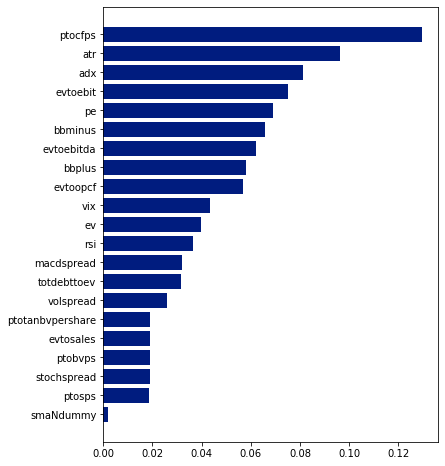

In [42]:
df_feat_importances = pd.DataFrame(list(zip(features_to_include,rfc_model.feature_importances_)), columns=['Feature','Importance'])
df_feat_importances.sort_values(by='Importance', inplace=True)

plt.figure(figsize=[6,8])
plt.barh(df_feat_importances['Feature'],df_feat_importances['Importance']);

### Gradient Boosted Trees

**Boosted Trees**: build many decision trees in series, where the subsequent model is built on the error from the previous model. In this configuration, additional models are fit on the effects that were not captured in the previous model. Then at the end, the different models are added together to give the final result.

Parameter Tuning: https://medium.com/all-things-ai/in-depth-parameter-tuning-for-gradient-boosting-3363992e9bae

In [43]:
from sklearn.ensemble import GradientBoostingClassifier

gbt_model = GradientBoostingClassifier(learning_rate=.01, n_estimators=50 , max_depth=10, min_samples_split=2, min_samples_leaf=2, max_features=20)
gbt_model.fit(std_x_train, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.01, loss='deviance', max_depth=10,
                           max_features=20, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=2, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=50,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [44]:
gbt_train_result = gbt_model.score(std_x_train, y_train).round(3)

print('gbt N-day: ', gbt_train_result)

gbt N-day:  0.923


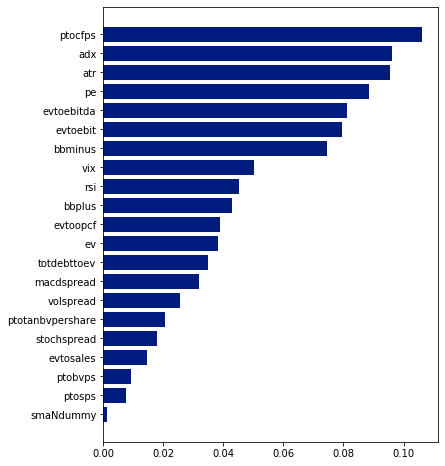

In [45]:
df_feat_importances_gbt = pd.DataFrame(list(zip(features_to_include,gbt_model.feature_importances_)), columns=['Feature','Importance'])
df_feat_importances_gbt.sort_values(by='Importance', inplace=True)

plt.figure(figsize=[6,8])
plt.barh(df_feat_importances_gbt['Feature'],df_feat_importances_gbt['Importance']);

### Summary of Train Dataset:

In [46]:
print('log N-day: ',log_train_result)
print('svm N-day: ', svm_train_result)
print('tree N-day: ', tree_train_result)
print('rfc N-day: ', rfc_train_result)
print('gbt N-day: ', gbt_train_result)

log N-day:  0.671
svm N-day:  0.779
tree N-day:  0.746
rfc N-day:  0.939
gbt N-day:  0.923


## Model Validation on Test Data

### Accuracy

In [47]:
log_new = std_x_test
log_new = log_model.predict(log_new)
log_test_result = metrics.accuracy_score(log_new, y_test).round(3)
print('log accuracy score: ', log_test_result)

log accuracy score:  0.569


In [48]:
svm_new = std_x_test
svm_new = svm_model.predict(svm_new)
svm_test_result = metrics.accuracy_score(svm_new, y_test).round(3)
print('svm accuracy score: ',svm_test_result)

svm accuracy score:  0.545


In [49]:
tree_new = std_x_test
tree_new = tree_model.predict(tree_new)
tree_test_result = metrics.accuracy_score(tree_new, y_test).round(3)
print('tree accuracy score: ',tree_test_result)

tree accuracy score:  0.536


In [50]:
rfc_new = std_x_test
rfc_new = rfc_model.predict(rfc_new)
rfc_test_result = metrics.accuracy_score(rfc_new, y_test).round(3)
print('rfc accuracy score: ',rfc_test_result)

rfc accuracy score:  0.545


In [51]:
gbt_new = std_x_test
gbt_new = gbt_model.predict(gbt_new)
gbt_test_result = metrics.accuracy_score(gbt_new, y_test).round(3)
print('gbt accuracy score: ',gbt_test_result)

gbt accuracy score:  0.58


### Confusion Matrix

- True Positives (TP): These are cases in which we predicted 1 (the price would be up), and the price was actually up.
- True Negatives (TN): We predicted that the price would be down, and it was down.
- False Positives (FP): We predicted the price was up, but the price as down. (Also known as a "Type I error.")
- False Negatives (FN): We predicted the price was down, but it was up. (Also known as a "Type II error.")

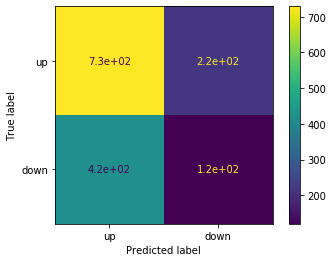

In [52]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

log_y_matrix = confusion_matrix(y_test,log_new, labels=[1,0])
ConfusionMatrixDisplay(log_y_matrix,display_labels = ['up','down']).plot();

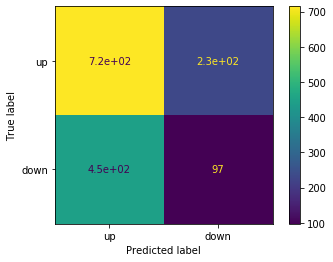

In [53]:
svm_y_matrix = confusion_matrix(y_test, svm_new,labels=[1,0])
ConfusionMatrixDisplay(svm_y_matrix, display_labels = ['up','down']).plot(); 

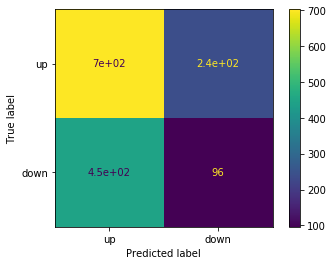

In [54]:
tree_y_matrix = confusion_matrix(y_test,tree_new, labels=[1,0])
ConfusionMatrixDisplay(tree_y_matrix, display_labels = ['up','down']).plot();

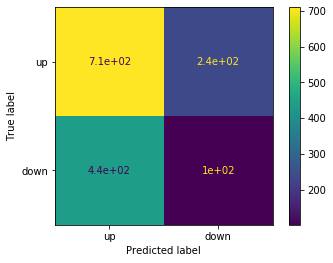

In [55]:
rfc_y_matrix = confusion_matrix(y_test,rfc_new, labels=[1,0])
ConfusionMatrixDisplay(rfc_y_matrix, display_labels = ['up','down']).plot();

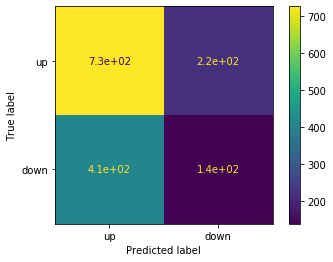

In [56]:
gbt_y_matrix = confusion_matrix(y_test,gbt_new, labels=[1,0])
ConfusionMatrixDisplay(gbt_y_matrix, display_labels = ['up','down']).plot();

### Precision = 'Predicted' Total Positive

The precision is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives. The precision is intuitively the ability of the classifier not to label as positive a sample that is negative.

Out of all the positive classes we have predicted correctly, how many are actually positive.

In [57]:
from sklearn.metrics import precision_score
log_precision = precision_score(log_new, y_test).round(3)
print('log precision score: ', log_precision)

log precision score:  0.771


In [58]:
svm_precision = precision_score(svm_new, y_test).round(3)
print('svm precision score: ', svm_precision)

svm precision score:  0.756


In [59]:
tree_precision = precision_score(tree_new, y_test).round(3)
print('tree precision score: ', tree_precision)

tree precision score:  0.743


In [60]:
rfc_precision = precision_score(rfc_new, y_test).round(3)
print('rfc precision score: ', rfc_precision)

rfc precision score:  0.751


In [61]:
gbt_precision = precision_score(gbt_new, y_test).round(3)
print('gbt precision score: ', gbt_precision)

gbt precision score:  0.768


### Recall = 'Actual' Total Positive

The recall is the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives. The recall is intuitively the ability of the classifier to find all the positive samples.

Out of all the positive classes, we have predicted x correctly. It should be as high as possible.

In [62]:
from sklearn.metrics import recall_score
log_recall = recall_score(log_new, y_test).round(3)
print('log recall score: ', log_recall)

log recall score:  0.632


In [63]:
svm_recall = recall_score(svm_new, y_test).round(3)
print('svm recall score: ', svm_recall)

svm recall score:  0.615


In [64]:
tree_recall = recall_score(tree_new, y_test).round(3)
print('tree recall score: ', tree_recall)

tree recall score:  0.61


In [65]:
rfc_recall = recall_score(rfc_new, y_test).round(3)
print('rfc recall score: ', rfc_recall)

rfc recall score:  0.616


In [66]:
gbt_recall = recall_score(gbt_new, y_test).round(3)
print('gbt recall score: ', gbt_recall)

gbt recall score:  0.641


### F1 

It is difficult to compare two models with low precision and high recall or vice versa. So, to make them comparable, we use F-Score. F-Score helps to measure Recall and Precision at the same time. 

The F1 score can be interpreted as a weighted mean of the precision and recall, where an F1 score reaches its best value at 1 and the worst score at 0. The relative contribution of precision and recall to the F1 score are equal. The formula for the F1 score is:

F1 = 2 * (precision * recall) / (precision + recall)

In [67]:
from sklearn.metrics import f1_score
log_f1 = f1_score(log_new, y_test).round(3)
print('log f1 score: ', log_f1)

log f1 score:  0.694


In [68]:
svm_f1 = f1_score(svm_new, y_test).round(3)
print('svm f1 score: ', svm_f1)

svm f1 score:  0.678


In [69]:
tree_f1 = f1_score(tree_new, y_test).round(3)
print('tree f1 score: ', tree_f1)

tree f1 score:  0.67


In [70]:
rfc_f1 = f1_score(rfc_new, y_test).round(3)
print('rfc f1 score: ', rfc_f1)

rfc f1 score:  0.677


In [71]:
gbt_f1 = f1_score(gbt_new, y_test).round(3)
print('gbt f1 score: ', gbt_f1)

gbt f1 score:  0.699


## Looking Forward

In [72]:
fx_train = df[['totdebttoev', 'ev',
       'evtosales', 'ptosps', 'evtoebit', 'pe', 'ptocfps', 'evtoopcf',
       'ptobvps', 'ptotanbvpershare', 'evtoebitda', 'atr',
       'bbplus', 'bbminus', 'macdspread', 'smaNdummy', 'adx', 'rsi',
       'stochspread', 'volspread', 'vix']][:z]
fy_train = df[['priceiny']][:z]

fx_test = df[['totdebttoev', 'ev',
       'evtosales', 'ptosps', 'evtoebit', 'pe', 'ptocfps', 'evtoopcf',
       'ptobvps', 'ptotanbvpershare', 'evtoebitda', 'atr',
       'bbplus', 'bbminus', 'macdspread', 'smaNdummy', 'adx', 'rsi',
       'stochspread', 'volspread', 'vix']][z:]
fy_test = df[['priceiny']][z:]

fstd_x_train = scaler.fit(fx_train).transform(fx_train)
fstd_x_test = scaler.fit(fx_test).transform(fx_test)

log_model.fit(fstd_x_train,fy_train)
flog_train = log_model.score(fstd_x_train, fy_train).round(3)
flog_new = fstd_x_test
flog_new = log_model.predict(flog_new)

svm_model.fit(fstd_x_train,fy_train)
fsvm_train = svm_model.score(fstd_x_train, fy_train).round(3)
fsvm_new = fstd_x_test
fsvm_new = svm_model.predict(fsvm_new)

tree_model.fit(fstd_x_train,fy_train)
ftree_train = tree_model.score(fstd_x_train, fy_train).round(3)
ftree_new = fstd_x_test
ftree_new = tree_model.predict(ftree_new)

rfc_model.fit(fstd_x_train,fy_train)
frfc_train = rfc_model.score(fstd_x_train, fy_train).round(3)
frfc_new = fstd_x_test
frfc_new = tree_model.predict(frfc_new)

gbt_model.fit(fstd_x_train,fy_train)
fgbt_train = gbt_model.score(fstd_x_train, fy_train).round(3)
fgbt_new = fstd_x_test
fgbt_new = gbt_model.predict(fgbt_new)

In [73]:
fx_test['log_new'] = flog_new
fx_test['svm_new'] = fsvm_new
fx_test['tree_new'] = ftree_new
fx_test['rfc_new'] = frfc_new
fx_test['gbt_new'] = fgbt_new

In [74]:
df = df[~df.index.duplicated()]
fx_test['price'] = df['priceclose']

In [75]:
fx_test.iloc[-25:,-6:]

,log_new,svm_new,tree_new,rfc_new,gbt_new,price
Date,,,,,,
2020-10-19,0,0,0,0,1,115.98
2020-10-20,0,0,0,0,1,117.51
2020-10-21,0,0,0,0,1,116.87
2020-10-22,0,0,0,0,1,115.75
2020-10-23,0,0,0,0,1,115.04
2020-10-26,0,0,0,0,1,115.05
2020-10-27,0,0,0,0,1,116.60
2020-10-28,0,0,0,0,1,111.20
2020-10-29,0,0,0,0,1,115.32


In [76]:
fx_test.index = pd.to_datetime(fx_test.index)

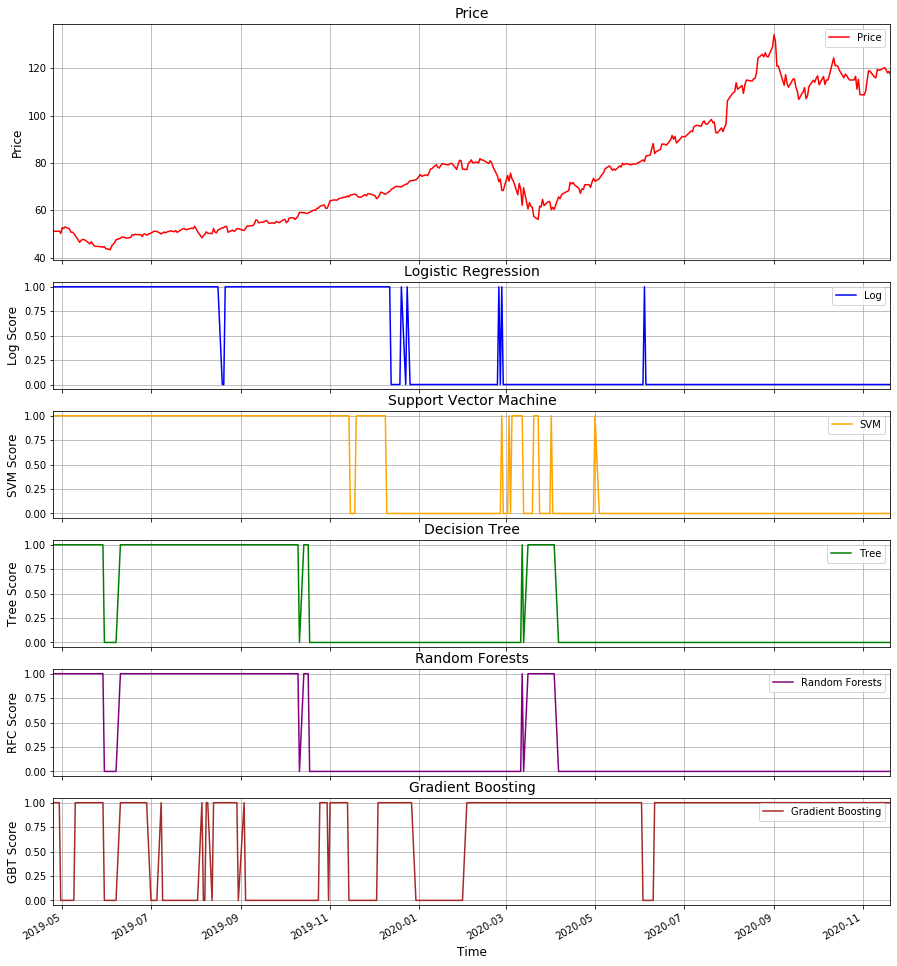

In [79]:
t= -400

import matplotlib.gridspec as gridspec

fig = plt.figure(figsize=(15,18))
gridspec.GridSpec(4,1)

plt.subplot2grid((7,1), (0,0),rowspan=2)  
plt.plot(fx_test.index[t:],fx_test['price'][t:],label='Price', color='red')
plt.xlabel('Time', size=12)
plt.ylabel('Price',size=12)
plt.legend()
plt.xlim(fx_test.index[t],fx_test.index[-1])
plt.title('Price',size=14)
plt.grid()
fig.autofmt_xdate()

plt.subplot2grid((7,1), (2,0),rowspan=1)
plt.plot(fx_test.index[t:], fx_test['log_new'][t:],label='Log', color='blue')
plt.xlabel('Time', size=12)
plt.ylabel('Log Score',size=12)
plt.xlim(fx_test.index[t],fx_test.index[-1])
plt.title('Logistic Regression',size=14)
plt.legend()
plt.grid()
fig.autofmt_xdate()

plt.subplot2grid((7,1), (3,0),rowspan=1)
plt.plot(fx_test.index[t:], fx_test['svm_new'][t:],label='SVM', color='orange')
plt.xlabel('Time', size=12)
plt.ylabel('SVM Score',size=12)
plt.xlim(fx_test.index[t],fx_test.index[-1])
plt.title('Support Vector Machine',size=14)
plt.legend()
plt.grid()
fig.autofmt_xdate()

plt.subplot2grid((7,1), (4,0),rowspan=1)
plt.plot(fx_test.index[t:], fx_test['tree_new'][t:],label='Tree', color='green')
plt.xlabel('Time', size=12)
plt.ylabel('Tree Score',size=12)
plt.xlim(fx_test.index[t],fx_test.index[-1])
plt.title('Decision Tree',size=14)
plt.legend()
plt.grid()
fig.autofmt_xdate()

plt.subplot2grid((7,1), (5,0),rowspan=1)
plt.plot(fx_test.index[t:], fx_test['rfc_new'][t:],label='Random Forests', color='purple')
plt.xlabel('Time', size=12)
plt.ylabel('RFC Score',size=12)
plt.xlim(fx_test.index[t],fx_test.index[-1])
plt.title('Random Forests',size=14)
plt.legend()
plt.grid()
fig.autofmt_xdate()

plt.subplot2grid((7,1), (6,0),rowspan=1)
plt.plot(fx_test.index[t:], fx_test['gbt_new'][t:],label='Gradient Boosting', color='brown')
plt.xlabel('Time', size=12)
plt.ylabel('GBT Score',size=12)
plt.xlim(fx_test.index[t],fx_test.index[-1])
plt.title('Gradient Boosting',size=14)
plt.legend()
plt.grid()
fig.autofmt_xdate()

plt.show()

The market should be (up=1, down=0) in N-days from now, where N-day was set at Y label at the beginning of the model. 

### Future Improvements
- Find the optimal window period for the label
- Run the analysis on a universe of stocks and aggregated the buy/sell signal at the index level
- Add/Remove features
- Parameter tuning for each model

Good luck with the market! 

Guillaume Girard, CMT 

Fierce Research